In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [293]:
df = pd.read_csv('/Users/carlosgovea/Documents/Flatiron/Phas-2-Project/Phase-2-Project/data/cleaned_2.csv')

In [294]:
df.drop(['Unnamed: 0'], axis=1,inplace =True)

In [295]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,1.0,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,1.0,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,1.0,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,1.0,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,1.0,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15954,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,1.0,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
15955,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,1.0,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
15956,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,1.0,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
15957,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,1.0,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


## MODEL #1

In [296]:
copy_1 = df.copy()
X= copy_1.drop(['price','date','id'], axis =1)
y = copy_1['price']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [297]:
#create a OneHotEncoder object, create arrays for categoricals and labels
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode']]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [298]:
#ZIPCODE ONLY CATEGORICAL 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8369757341912774
Test: 0.8313416830198964


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

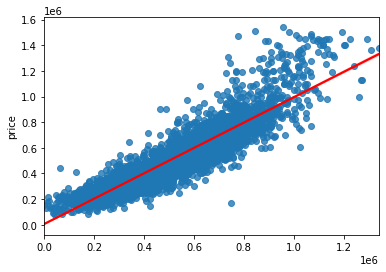

In [299]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test, line_kws={"color": "red"})

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

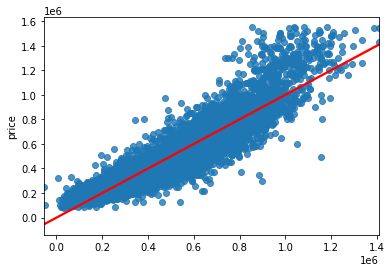

In [300]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,line_kws={"color": "red"})

## MODEL #2

In [301]:
copy_2 = df.copy()
X= copy_2.drop(['price','date','id','waterfront','view','lat','long'], axis =1)
y = copy_2['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [302]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode']]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [303]:
#ZIPCODE, DROPPING UNNEEDED FEATURES
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8224365850054665
Test: 0.8173485280918265


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #2')

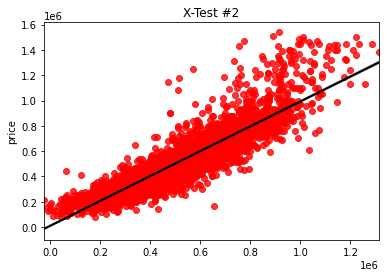

In [304]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='red',line_kws={"color": "black"})
plt.title('X-Test #2')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #2')

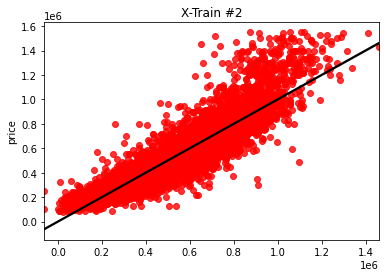

In [305]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='red',line_kws={"color": "black"})
plt.title('X-Train #2')

 ## MODEL #3

In [306]:
copy_3 = df.copy()
X= copy_3.drop(['price','date','id','waterfront','view','lat','long','yr_renovated',], axis =1)
y = copy_3['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [307]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode']]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [308]:
#ZIPCODE, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8215310379522951
Test: 0.8155327081384024


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #3')

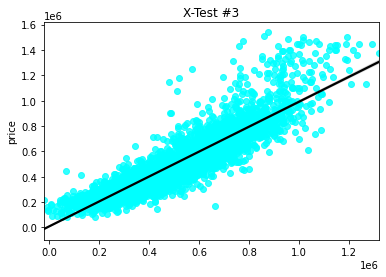

In [309]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='cyan',line_kws={"color": "black"})
plt.title('X-Test #3')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #3')

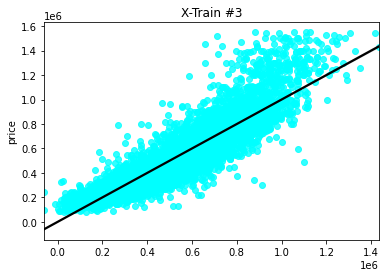

In [310]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='cyan',line_kws={"color": "black"})
plt.title('X-Train #3')

## MODEL #4

In [311]:
# ONE HOT ENCODING FOR GRADE AND ZIPCODE WITH EXCLUDED FEATURES
copy_4 = df.copy()
X= copy_4.drop(['price','date','id','waterfront','view','lat','long','yr_renovated','sqft_living15',"sqft_lot15"], axis =1)
y = copy_4['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [312]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode','grade']]).toarray()
ohe_test = ohe.transform(X_test[['zipcode','grade']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode','grade'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode','grade'], axis = 1, inplace = True)

In [313]:
#ZIPCODE + GRADE, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.826279557173119
Test: 0.820863538122582


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #4')

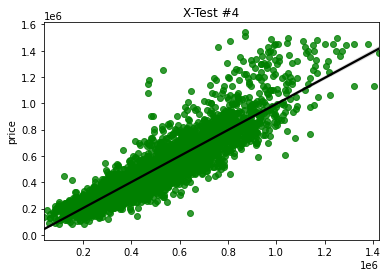

In [314]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='green',line_kws={"color": "black"})
plt.title('X-Test #4')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #4')

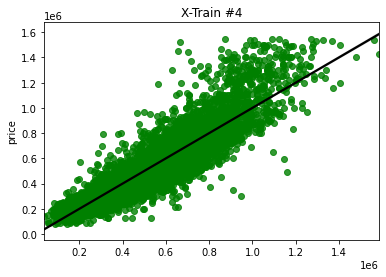

In [315]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='green',line_kws={"color": "black"})
plt.title('X-Train #4')

## MODEL #5

In [316]:
# ONE HOT ENCODING FOR GRADE AND ZIPCODE WITH EXCLUDED FEATURES
copy_5 = df.copy()
X= copy_5.drop(['price','date','id','waterfront','view','lat','long','yr_renovated','sqft_living15',"sqft_lot15"], axis =1)
y = copy_5['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [317]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode','month_sold']]).toarray()
ohe_test = ohe.transform(X_test[['zipcode','month_sold']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode','month_sold'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode','month_sold'], axis = 1, inplace = True)

In [318]:
#ZIPCODE + MONTH SOLD, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8203667517783494
Test: 0.8138936388021722


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #5')

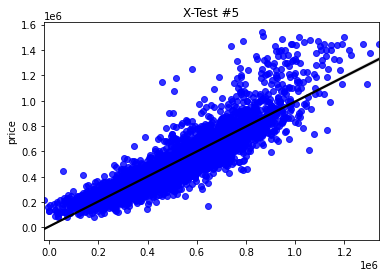

In [319]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='blue',line_kws={"color": "black"})
plt.title('X-Test #5')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #5')

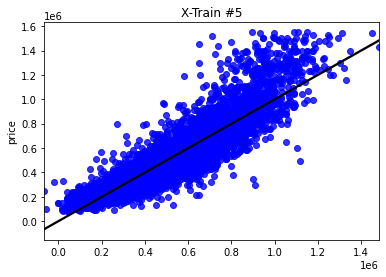

In [320]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='blue',line_kws={"color": "black"})
plt.title('X-Train #5')

## MODEL #6

In [321]:
# ZIPCODE ONLY OHE COLUMN, DROPPING YEAR BUILT
copy_6 = df.copy()
X= copy_6.drop(['price','date','id','waterfront','view','lat','long','yr_renovated','sqft_living15',"sqft_lot15",'year_sold'], axis =1)
y = copy_6['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [322]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode',]]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [323]:
#ZIPCODE + MONTH SOLD, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8178495518442263
Test: 0.8115483060128558


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #6')

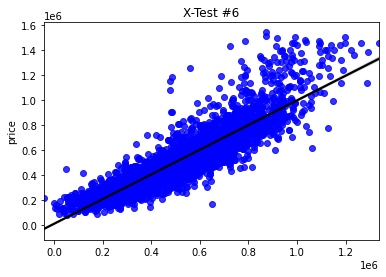

In [324]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='blue',line_kws={"color": "black"})
plt.title('X-Test #6')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #6')

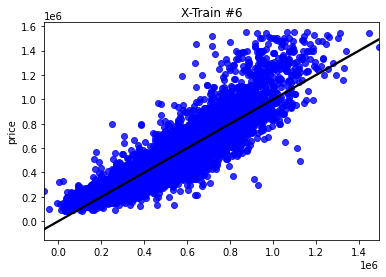

In [325]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='blue',line_kws={"color": "black"})
plt.title('X-Train #6')

## MODEL #7

In [326]:
# ZIPCODE ONLY OHE COLUMN, DROPPING YEAR BUILT
copy_7 = df.copy()
X= copy_7.drop(['price','date','id','waterfront','view','lat','long','yr_renovated','sqft_living15',"sqft_lot15",'yr_built'], axis =1)
y = copy_7['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [327]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode',]]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [328]:
#ZIPCODE + MONTH SOLD, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8142915591452171
Test: 0.8087464509540211


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #7')

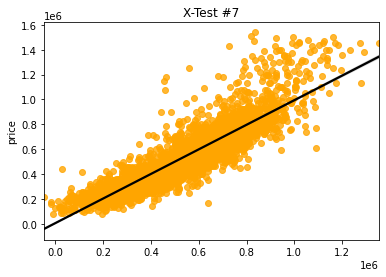

In [329]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='orange',line_kws={"color": "black"})
plt.title('X-Test #7')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #7')

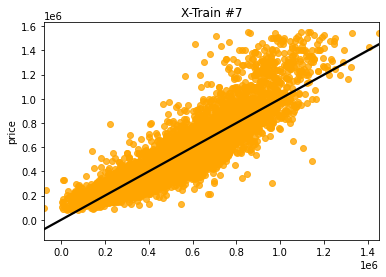

In [330]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='orange',line_kws={"color": "black"})
plt.title('X-Train #7')

## MODEL #8

In [331]:
copy_8 = df.copy()
X= copy_8.drop(['price','date','id','waterfront','view','lat','long','yr_renovated','sqft_living15',"sqft_lot15",'yr_built','year_sold',"month_sold","sqft_basement"], axis =1)
y = copy_8['price']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [332]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode',]]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [333]:
#ZIPCODE + MONTH SOLD, DROPPING UNNEEDED FEATURES #2
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8113528703706052
Test: 0.805748352275445


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test #8')

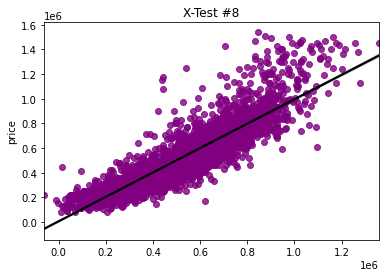

In [334]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='purple',line_kws={"color": "black"})
plt.title('X-Test #8')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #8')

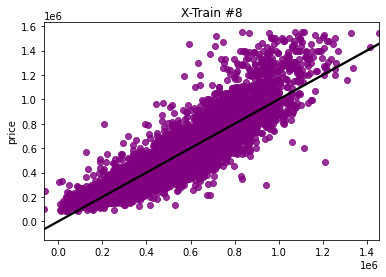

In [335]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='Purple',line_kws={"color": "black"})
plt.title('X-Train #8')

In [336]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
0,3,1.00,1180,5650,1.0,3,4,1180,98178
1,3,2.25,2570,7242,2.0,3,4,2170,98125
2,2,1.00,770,10000,1.0,3,3,770,98028
3,4,3.00,1960,5000,1.0,5,4,1050,98136
4,3,2.00,1680,8080,1.0,3,5,1680,98074
...,...,...,...,...,...,...,...,...,...
15954,3,2.50,1530,1131,3.0,3,5,1530,98103
15955,4,2.50,2310,5813,2.0,3,5,2310,98146
15956,2,0.75,1020,1350,2.0,3,4,1020,98144
15957,3,2.50,1600,2388,2.0,3,5,1600,98027


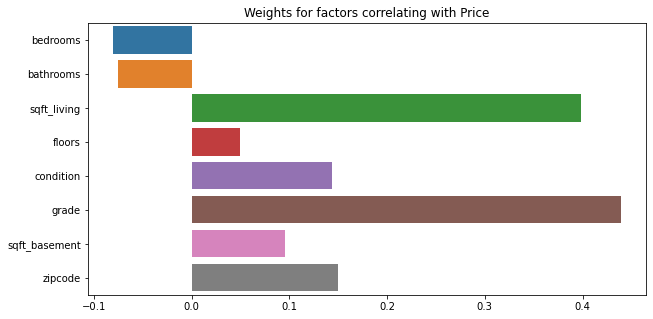

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2138.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:43:37   Log-Likelihood:                -16831.
No. Observations:               15959   AIC:                         3.368e+04
Df Residuals:                   15950   BIC:                         3.375e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.014e-14      0.006   1.84e-12      1.000      -0.011       0.011
bedrooms         -0.0800      0.007    -10.921      0.000      -0.094      -0.066
bathrooms        -0.0748      0.009     -8.174      0.000      -0.093      -0.057
sqft_living       0.3987      0.011     36.683      0.000       0.377       0.420
floors            0.0495      0.008      6.349      0.000       0.034       0.065
condition         0.1441      0.006     24.746      0.000       0.133       0.155
grade             0.4388      0.008     52.419      0.000       0.422       0.455
sqft_basement     0.0960      0.007     13.200      0.000       0.082       0.110
zipcode           0.1498      0.006     25.497      0.000       0.138       0.161
==============================================================================
Omnibus:                     2363.103   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5142.092
Skew:                           0.883   Prob(JB):                         0.00
Kurtosis:                       5.148   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
feature_cols= ['bedrooms','bathrooms','sqft_living','floors','condition','grade','sqft_basement','zipcode']
X = df[feature_cols]
X_standard = X.apply(lambda x: (x - x.mean())/x.std())
y = df['price']
y_standard = (y - y.mean())/y.std()
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

weights=res.params

plt.figure(figsize=(10,5))
sns.barplot(y=weights[1:].index,x=weights[1:].values)
plt.title('Weights for factors correlating with Price')
plt.show()
res.summary()

## FINAL MODEL :')

In [338]:
copy_9 = df.copy()

In [339]:
copy_9['lot_living'] = (copy_9['sqft_living']* copy_9['sqft_lot'])

In [340]:
X= copy_9.drop(['price','date','id','sqft_living','sqft_lot','bedrooms','bathrooms','yr_built'], axis =1)
y = copy_9['price']

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [341]:
ohe = OneHotEncoder(handle_unknown='ignore')


ohe_train = ohe.fit_transform(X_train[['zipcode',]]).toarray()
ohe_test = ohe.transform(X_test[['zipcode']]).toarray()

ohe_train=  pd.DataFrame(ohe_train, columns= ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = X_train.index
ohe_test.index = X_test.index

X_train = pd.concat([X_train, ohe_train],1 )

X_test = pd.concat([X_test, ohe_test],1)
X_test.drop(['zipcode'],1,inplace =True)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [342]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

X_standardized_train.mean(axis=0)
X_standardized_train.std(axis=0)

X_standardized_test.mean(axis=0)
X_standardized_test.std(axis=0)


linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_
print('Train:',linreg.score(X_train, y_train))
print('Test:',linreg.score(X_test,y_test))

Train: 0.8332027399920109
Test: 0.8272691612116967


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Test Final')

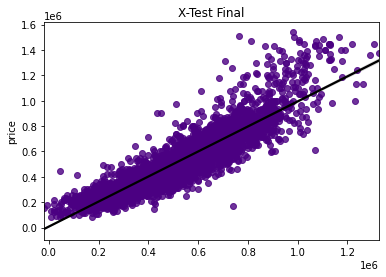

In [343]:
prediction = linreg.predict(X_test)
sns.regplot(prediction,y_test,color='indigo',line_kws={"color": "black"})
plt.title('X-Test Final')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'X-Train #8')

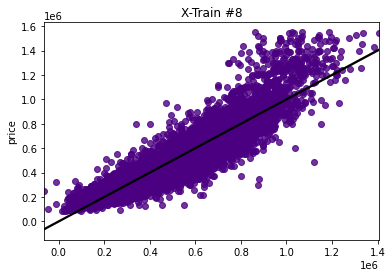

In [216]:
prediction = linreg.predict(X_train)
sns.regplot(prediction,y_train,color='indigo',line_kws={"color": "black"})
plt.title('X-Train #8')

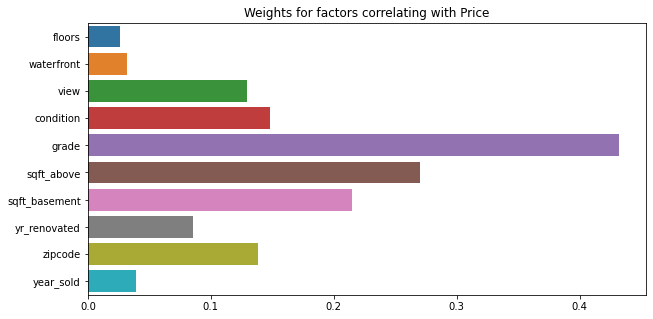

<Figure size 432x288 with 0 Axes>

In [223]:
feature_cols= ['floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'year_sold']
X = df[feature_cols]
X_standard = X.apply(lambda x: (x - x.mean())/x.std())
y = df['price']
y_standard = (y - y.mean())/y.std()
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

weights=res.params

plt.figure(figsize=(10,5))
sns.barplot(y=weights[1:].index,x=weights[1:].values)
plt.title('Weights for factors correlating with Price')
plt.show()
plt.savefig("Weights_corr.jpg")


In [224]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1855.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:18:29   Log-Likelihood:                -16489.
No. Observations:               15959   AIC:                         3.300e+04
Df Residuals:                   15948   BIC:                         3.308e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.114e-15      0.005   1.14e-12      1.000      -0.011       0.011
floors            0.0258      0.007      3.698      0.000       0.012       0.040
waterfront        0.0319      0.006      5.796      0.000       0.021       0.043
view              0.1296      0.006     22.534      0.000       0.118       0.141
condition         0.1480      0.006     25.908      0.000       0.137       0.159
grade             0.4324      0.008     53.777      0.000       0.417       0.448
sqft_above        0.2703      0.008     33.206      0.000       0.254       0.286
sqft_basement     0.2146      0.006     34.993      0.000       0.203       0.227
yr_renovated      0.0853      0.005     15.691      0.000       0.075       0.096
zipcode           0.1384      0.006     24.099      0.000       0.127       0.150
year_sold         0.0388      0.005      7.178      0.000       0.028       0.049
==============================================================================
Omnibus:                     1975.154   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3932.653
Skew:                           0.785   Prob(JB):                         0.00
Kurtosis:                       4.857   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

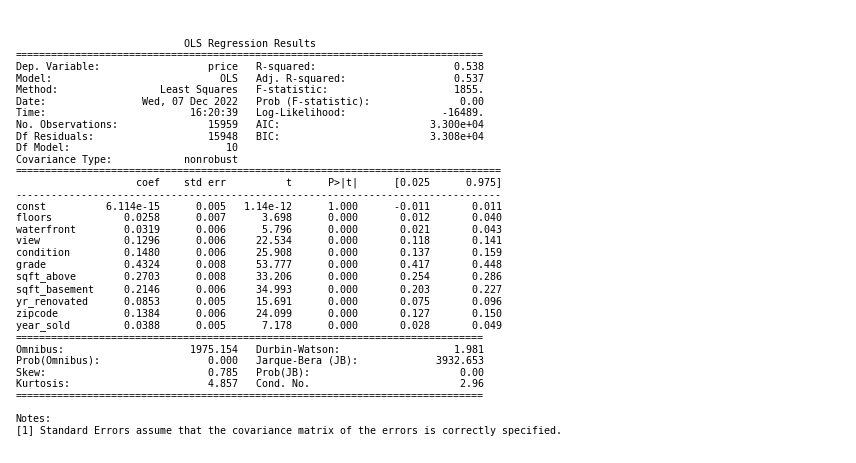

In [226]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(res.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig("OLS-Regression_Coeff.jpg")

In [348]:
import folium
home_locations = df[['long','lat','price']].sample(1000)
map = folium.Map(location =[home_locations.lat.mean(),home_locations.long.mean()],zoom_start=8,control_scale =False)
for index, location_info in home_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info['price']).add_to(map)
display(map)

<AxesSubplot:xlabel='long', ylabel='lat'>

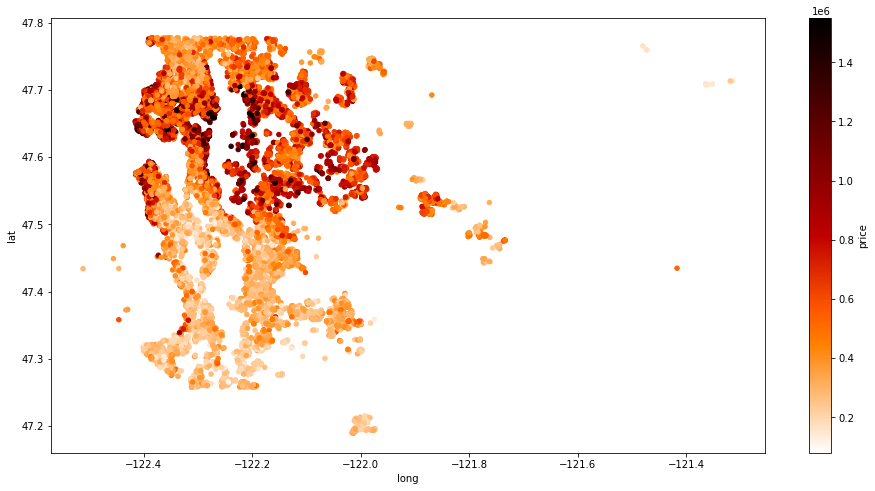

In [232]:
## HEATMAP FOR ZIPCODE
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", cmap="gist_heat_r", colorbar=True, sharex=False)